<a href="https://colab.research.google.com/github/adeepH/SRGAN/blob/master/diaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Dropout
from keras.layers import GlobalAveragePooling2D,Dense,Flatten,ReLU,Softmax
from keras.optimizers import Adam,SGD

from keras.activations import sigmoid,relu,softmax

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

# Model


In [ ]:
from keras.models import Sequential
model = Sequential()

model.add(Conv2D(8,(2,2),input_shape=(256,256,3),strides=(1,1)))
model.add(BatchNormalization(epsilon=0.0001)) 
model.add(MaxPooling2D(pool_size=(3,3),strides=(1,1),padding='same'))
model.add(ReLU())

model.add(Conv2D(16,(3,3),strides=(1,1)))
model.add(BatchNormalization(epsilon=0.00001)) 
model.add(MaxPooling2D(pool_size=(3,3),strides=(1,1),padding='same'))
model.add(ReLU())

model.add(Conv2D(32,(3,3),strides=(1,1)))
model.add(BatchNormalization(epsilon=0.00001)) 
model.add(MaxPooling2D(pool_size=(3,3),strides=(1,1),padding='same'))
model.add(ReLU())

model.add(Flatten())
model.add(Dense(2))
model.add(Dropout(0.3))
model.add(Dense(2))
model.add(Softmax())

model.compile(loss='binary_crossentropy',optimizer='SGD',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 255, 255, 8)       104       
_________________________________________________________________
batch_normalization (BatchNo (None, 255, 255, 8)       32        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 255, 255, 8)       0         
_________________________________________________________________
re_lu (ReLU)                 (None, 255, 255, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 253, 253, 16)      1168      
_________________________________________________________________
batch_normalization_1 (Batch (None, 253, 253, 16)      64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 253, 253, 16)      0

In [ ]:
from keras.utils import plot_model
plot_model(model,to_file='diaretdb0_architecture.png',
           show_shapes=False,
           show_layer_names=True,
           rankdir="TB")

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


# Data Augumentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory('E:\diaretdb_0\Train',
                                                target_size=(256,256),
                                                batch_size=8,
                                                class_mode='binary',
                                                 shuffle=True)
validation_set = test_datagen.flow_from_directory('E:\diaretdb_0\Test',
                                           target_size=(256,256),
                                           batch_size=8,
                                           class_mode='binary',
                                           shuffle=True)

Found 103 images belonging to 2 classes.
Found 27 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(train_set,
                             epochs=10,
                             validation_data=validation_set);

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
13/13 [==============================] - 35s 3s/step - loss: 6.4707 - accuracy: 0.8155 - val_loss: 7.6409 - val_accuracy: 0.8148
Epoch 2/10
13/13 [==============================] - 34s 3s/step - loss: 6.8955 - accuracy: 0.8544 - val_loss: 7.6409 - val_accuracy: 0.8148
Epoch 3/10
13/13 [==============================] - 34s 3s/step - loss: 6.8282 - accuracy: 0.8544 - val_loss: 7.6409 - val_accuracy: 0.8148
Epoch 4/10
13/13 [==============================] - 33s 3s/step - loss: 6.8282 - accuracy: 0.8544 - val_loss: 7.6409 - val_accuracy: 0.8148
Epoch 5/10
13/13 [==============================] - 34s 3s/step - loss: 7.3009 - accuracy: 0.8544 - val_loss: 7.6409 - val_accuracy: 0.8148
Epoch 6/10
13/13 [==============================] - 34s 3s/step - loss: 6.6944 - accuracy: 0.8544 - val_loss: 7.6409 - val_accuracy: 0.8148
Epoch 7/10
13/13 [==============================] - 34s 3s/step - loss: 7.0990 - acc

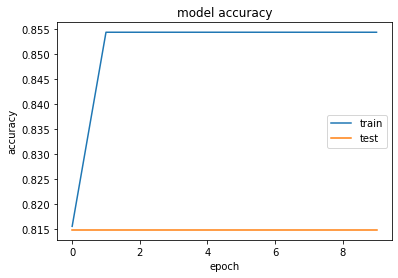

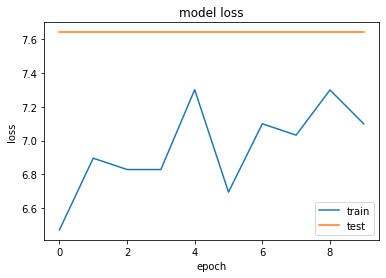

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

In [ ]:
model.save('E:\diaretdb_0\diaretdb0_model.h5')

In [ ]:
from keras.models import load_model
classifier = load_model('E:\diaretdb_0\diaretdb0_model.h5')

# Prediction of Single image

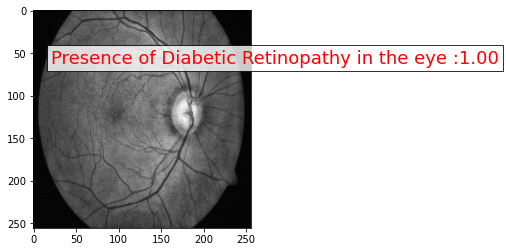

In [ ]:
%matplotlib inline
import PIL
from keras.preprocessing import image
img1 = image.load_img('E:\diaretdb_0\Test\Disease\image089.png', target_size=(256,256))
img = image.img_to_array(img1)
img = img/255

#creating a batch of size 1 [N,H,W,C]

img = np.expand_dims(img,axis=0)
prediction = model.predict(img,batch_size=None,steps=1)

if(prediction.any()>0.5):
    value ='Presence of Diabetic Retinopathy in the eye :%1.2f'%(prediction.any())
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Disease free eye :%1.2f'%(1.0-prediction.any())
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()
